# Scatter plot

Test Spearman's rho: 0.840, p=0.000


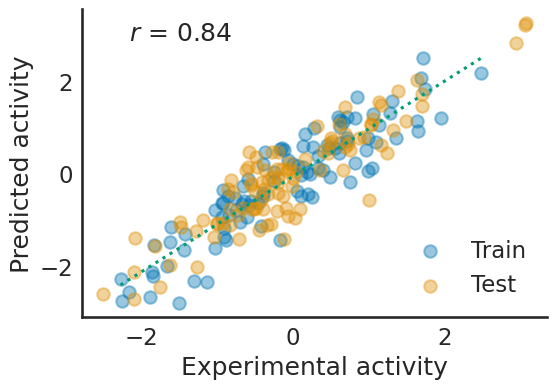

In [4]:
import numpy as np
import plot_style_utils
from scipy import stats
import seaborn as sns

plot_style_utils.set_pub_plot_context(context="talk")
fig, ax = plot_style_utils.simple_ax()
plot_style_utils.prettify_ax(ax)

ys_train = np.random.normal(0, 1, 100)
ys_train_pred = ys_train + np.random.normal(0, 0.5, 100)

ys_test = np.random.normal(0, 1, 100)
ys_test_pred = ys_test + np.random.normal(0, 0.5, 100)

ax.scatter(ys_train, ys_train_pred, alpha=0.4, label='Train', color=plot_style_utils.CAT_PALETTE[0])
ax.scatter(ys_test, ys_test_pred, alpha=0.4, label='Test', color=plot_style_utils.CAT_PALETTE[1])
# ax.scatter([0.0], [-0.007327], alpha=1.0, label='Wild-type', color='black')

train_fit = np.polyfit(ys_train, ys_train_pred, 1)
x = np.sort(ys_train)
ax.plot(x, train_fit[0] * x + train_fit[1], linestyle=':', color=plot_style_utils.CAT_PALETTE[2])

spearman = stats.spearmanr(ys_test, ys_test_pred)

print(f"Test Spearman's rho: {spearman[0]:.3f}, p={spearman[1]:.3f}")
ax.text(0.1, 0.9, "$\it{r}$"+f" = {spearman[0]:.2f}", transform=ax.transAxes)

ax.set_xlabel('Experimental activity')
ax.set_ylabel('Predicted activity')

ax.legend(loc='lower right', frameon=False)
# ax.set_xlim(-10.2, 2.7)
# ax.set_ylim(-11, 2.5)

plot_style_utils.save_for_pub(fig=fig, path='figures/eval_reg_model')